In [1]:
'''
    Precipitation Data Source: https://psl.noaa.gov/thredds/catalog/Datasets/cmap/enh/catalog.html?dataset=Datasets/cmap/enh/precip.mon.mean.nc
'''

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import itertools
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [ ]:
lat, lon = -18.384310, -39.687290
lon = lon % 360

In [18]:
dado = xr.open_mfdataset('precip.mon.mean.nc')
prec = dado['precip'].sel(lat=lat, lon=lon,method='nearest')
df = prec.to_dataframe()['precip']

/Users/breno/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


<xarray.DataArray 'precip' (time: 536)>
dask.array<getitem, shape=(536,), dtype=float32, chunksize=(536,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 -18.75
    lon      float32 321.2
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-08-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Enhanced
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    valid_range:   [   0. 2000.]
    actual_range:  [   0.   1170.24]

In [ ]:
# makes a result for monthly average and for accumulated precipitation
(df.resample('Y').mean()*365).to_excel(f'{os.getcwd()}/acumulado_anual.xlsx')
df.to_excel(f'{os.getcwd()}/media_mensal.xlsx')

In [54]:
lats = dado.lat.values
lons = (dado.lon + 180) % 360 - 180

In [27]:
lat_modelo = prec.lat.values
lon_modelo = (prec.lon.values + 180) % 360 - 180

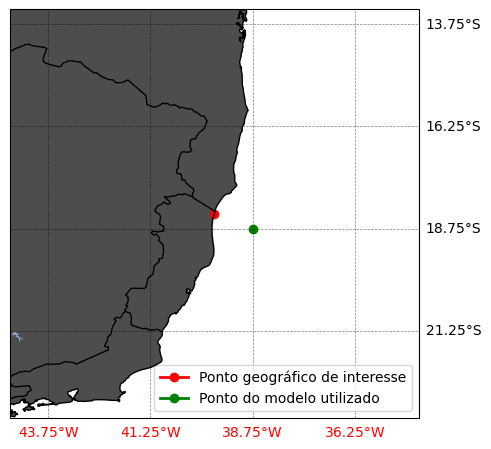

In [56]:
# PLOTS REANALISYS POINT VS MEASURED DATA POINT

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(5,5))

lon_max, lon_min, lat_max, lat_min = lon + 5 , lon - 5, lat + 5, lat - 5
ax.set_extent([lon_max, lon_min, lat_max, lat_min], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='0.3')
ax.add_feature(cfeature.LAKES, alpha=0.9)  
ax.add_feature(cfeature.BORDERS, zorder=10)
ax.add_feature(cfeature.COASTLINE, zorder=10)

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',  name='admin_1_states_provinces_lines',
        scale='50m', facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', zorder=10) 



gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=.5,
                  color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xlocator = mticker.FixedLocator(lons)
gl.ylocator = mticker.FixedLocator(lats)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'red'}
#     ax.set_title('Grade ')


plt.plot(lon, lat,
        color='red', linewidth=2, marker='o',
        transform=ccrs.PlateCarree(), label = 'Ponto geográfico de interesse'
        )  
#     plt.text(lon - 0.005, lat - 0.005, 'Ponto geográfico',
#           horizontalalignment='right', color = 'red', weight = 'bold',
#                        transform=ccrs.PlateCarree())  


plt.plot(lon_modelo, lat_modelo,
        color='green', linewidth=2, marker='o',
        transform=ccrs.PlateCarree(), label = 'Ponto do modelo utilizado'
        )  

plt.legend(loc='lower right')
#     plt.text(lon_modelo + 3, lat_modelo - 0.005, 'Ponto do modelo utilizado',
#           horizontalalignment='right', color = 'green', weight = 'bold',
#                        transform=ccrs.PlateCarree())  

plt.tight_layout()